# Importing Data in Python (Part1)

As a Data Scientist, on a daily basis you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before doing any of these, however, you will need to know how to get data into Python. In the prequel to this course, you have already learnt many ways to import data into Python: (i) from flat files such as .txts and .csvs; (ii) from files native to other software such as Excel spreadsheets, Stata, SAS and MATLAB files; (iii) from relational databases such as SQLite & PostgreSQL. In this course, you'll extend this knowledge base by learning to import data (i) from the web and (ii) a special and essential case of this: pulling data from Application Programming Interfaces, also known as APIs, such as the Twitter streaming API, which allows us to stream real-time tweets.

## 1. Introduction and flat files

In this chapter, you'll learn how to import data into Python from all types of flat files, a simple and prevalent form of data storage. You've previously learned how to use NumPy and pandas - you will learn how to use these packages to import flat files, as well as how to customize your imports.

### 1.1 Importing entire text files
In this exercise, you'll be working with the file moby_dick.txt. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

**Instructions**

- Open the file `moby_dick.txt` as read-only and store it in the variable `file`. Make sure to pass the filename enclosed in quotation marks `''`.
- Print the contents of the file to the shell using the `print()` function. As Hugo showed in the video, you'll need to apply the method `read()` to the object `file`.
- Check whether the file is closed by executing `print(file.closed)`.
- Close the file using the `close()` method.
- Check again that the file is closed as you did above.


In [2]:
# Open a file: file
file = open('./Data/moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

### 1.2 Importing text files line by line
For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the readline() method, which allows you to do this. When a file called file is open, you can print out the first line by executing file.readline(). If you execute the same command again, the second line will print, and so on.

In the introductory video, Hugo also introduced the concept of a context manager. He showed that you can bind a variable file by using a context manager construct:
~~~
with open('huck_finn.txt') as file:
~~~

While still within this construct, the variable `file` will be bound to `open('huck_finn.txt')`; thus, to print the file to the shell, all the code you need to execute is:
~~~
with open('huck_finn.txt') as file:
    print(file.readline())
~~~ 
You'll now use these tools to print the first few lines of `moby_dick.txt`!

**Instructions**

- Open `moby_dick.txt` using the `with` context manager and the variable `file`.
- Print the first three lines of the file to the shell by using `readline()` three times within the context manager.

In [3]:
# Read & print the first 3 lines
with open('./Data/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



### 1.3 Using NumPy to import flat files
In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function `loadtxt()` and see just how easy it can be:

The first argument will be the filename.
The second will be the delimiter which, in this case, is a comma.
You can find more information about the MNIST dataset here on the webpage of Yann LeCun, who is currently Director of AI Research at Facebook and Founding Director of the NYU Center for Data Science, among many other things.

**Instructions**

- Fill in the arguments of `np.loadtxt()` by passing `file` and a comma `','` for the delimiter.
- Fill in the argument of `print()` to print the type of the object `digits`. Use the function `type()`.
- Execute the rest of the code to visualize one of the rows of the data.

In [7]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = './Data/mnist_kaggle_some_rows.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


<class 'numpy.ndarray'>


<Figure size 640x480 with 1 Axes>

In [8]:
print(digits)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


### 1.4 Customizing your NumPy import
What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that `np.loadtxt()` takes that you'll find useful: `delimiter` changes the delimiter that `loadtxt()` is expecting, for example, you can use `','` and `'\t'` for comma-delimited and tab-delimited respectively; `skiprows` allows you to specify how many rows (not indices) you wish to skip; `usecols` takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, `digits_header.txt`,

- has a header
- is tab-delimited.

**Instructions**

- Complete the arguments of `np.loadtxt()`: the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.
- Complete the argument of the `print()` call in order to print the entire array that you just imported.

In [11]:
# Import numpy
import numpy as np

# Assign the filename: file
file = './Data/digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
print(data)


OSError: ./Data/digits_header.txt not found.

### 1.4 Importing different datatypes
The file `seaslug.txt`

- has a text header, consisting of strings
- is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. Read more here.

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it `could not convert string to float`. There are two ways to deal with this: firstly, you can set the data type argument `dtype` equal to `str` (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument.

**Instructions**

- Complete the first call to `np.loadtxt()` by passing `file` as the first argument.
- Execute `print(data[0])` to print the first element of `data`.
- Complete the second call to `np.loadtxt()`. The file you're importing is tab-delimited, the datatype is `float`, and you want to skip the first row.
- Print the 10th element of `data_float` by completing the `print()` command. Be guided by the previous `print()` call.
- Execute the rest of the code to visualize the data.

['Time' 'Percent']
[0.    0.357]


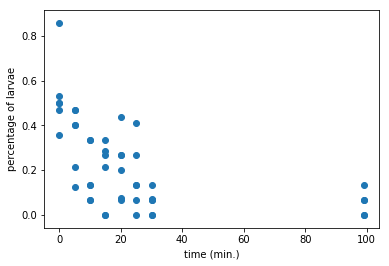

In [12]:
# Assign filename: file
file = './Data/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### 1.5 Working with mixed datatypes (1)
Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Import `'titanic.csv'` using the function `np.genfromtxt()` as follows:
~~~
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
~~~
Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name `'Fare'`, execute `data['Fare']`.

Print the entire column with name Survived to the shell. What are the last 4 values of this column?

**Instructions**

**Possible Answers**

1,0,0,1.  
1,2,0,0.  
**1,0,1,0.**  
0,1,1,1.  

In [15]:
data = np.genfromtxt('./Data/titanic.csv', delimiter=',', names=True, dtype=None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [21]:
print(data)

[(  1, 0, 3, b'male', 22.  , 1, 0, b'A/5 21171',   7.25  , b'', b'S')
 (  2, 1, 1, b'female', 38.  , 1, 0, b'PC 17599',  71.2833, b'C85', b'C')
 (  3, 1, 3, b'female', 26.  , 0, 0, b'STON/O2. 3101282',   7.925 , b'', b'S')
 (  4, 1, 1, b'female', 35.  , 1, 0, b'113803',  53.1   , b'C123', b'S')
 (  5, 0, 3, b'male', 35.  , 0, 0, b'373450',   8.05  , b'', b'S')
 (  6, 0, 3, b'male',   nan, 0, 0, b'330877',   8.4583, b'', b'Q')
 (  7, 0, 1, b'male', 54.  , 0, 0, b'17463',  51.8625, b'E46', b'S')
 (  8, 0, 3, b'male',  2.  , 3, 1, b'349909',  21.075 , b'', b'S')
 (  9, 1, 3, b'female', 27.  , 0, 2, b'347742',  11.1333, b'', b'S')
 ( 10, 1, 2, b'female', 14.  , 1, 0, b'237736',  30.0708, b'', b'C')
 ( 11, 1, 3, b'female',  4.  , 1, 1, b'PP 9549',  16.7   , b'G6', b'S')
 ( 12, 1, 1, b'female', 58.  , 0, 0, b'113783',  26.55  , b'C103', b'S')
 ( 13, 0, 3, b'male', 20.  , 0, 0, b'A/5. 2151',   8.05  , b'', b'S')
 ( 14, 0, 3, b'male', 39.  , 1, 5, b'347082',  31.275 , b'', b'S')
 ( 15, 0, 3, b

### 1.6 Working with mixed datatypes (2)
You have just used `np.genfromtxt()` to import data containing mixed datatypes. There is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

**Instructions**

- Import `titanic.csv` using the function `np.recfromcsv()` and assign it to the variable, d. You'll only need to pass `file` to it because it has the defaults `delimiter=','` and `names=True` in addition to `dtype=None`!
- Run the remaining code to print the first three entries of the resulting array `d`.

In [24]:
# Assign the filename: file
file = './Data/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, encoding = None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')]


### 1.7 Using pandas to import flat files as DataFrames (1)
In the last exercise, you were able to import flat files containing columns with different datatypes as `numpy` arrays. However, the `DataFrame` object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions `read_csv()` and `read_table()`.

**Instructions**

- Import the `pandas` package using the alias `pd`.
- Read `titanic.csv` into a DataFrame called `df`. The file name is already stored in the `file` object.
- In a `print()` call, view the head of the `DataFrame`.


In [33]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = './Data/titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


### 1.8 Using pandas to import flat files as DataFrames (2)
In the last exercise, you were able to import flat files into a `pandas` DataFrame. As a bonus, it is then straightforward to retrieve the corresponding `numpy` array using the attribute `values`. You'll now have a chance to do this using the MNIST dataset, which is available as `digits.csv`.

**Instructions**

- Import the first 5 rows of the file into a DataFrame using the function `pd.read_csv()` and assign the result to `data`. You'll need to use the arguments `nrows` and `header` (there is no header in this file).
- Build a `numpy` array from the resulting DataFrame in `data` and assign to `data_array`.
- Execute `print(type(data_array))` to print the datatype of `data_array`.

In [44]:
# Assign the filename: file
file = './Data/digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows = 5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


### 1.9 Customizing your pandas import
The `pandas` package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as `NA` or `NaN`. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which

- contains comments after the character `'#'`
- is tab-delimited.

**Instructions**

- Complete the `sep` (the `pandas` version of `delim`), `comment` and `na_values` arguments of `pd.read_csv()`. comment takes characters that comments occur after in the file, which in this case is `'#'`. `na_values` takes a list of strings to recognize as `NA/NaN`, in this case the string `'Nothing'`.
- Execute the rest of the code to print the head of the resulting DataFrame and plot the histogram of the `'Age'` of passengers aboard the Titanic.

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin    Embarked  
0         A/5 21171   7.2500   NaN  S #dfafdad  
1       PC 17599#to  71.2833   C85           C  
2  STON/O2. 3101282   7.9250   NaN           S  
3            113803  53.1000  C123           S  
4            373450   8.0500   NaN           S  


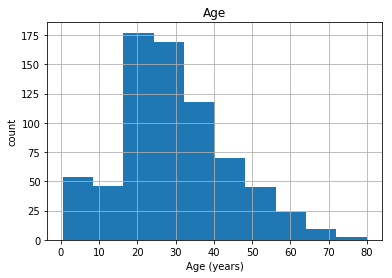

In [45]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = './Data/titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


## 2. Importing data from other file types

You've learned how to import flat files, but there are many other file types you will potentially have to work with as a data scientist. In this chapter, you'll learn how to import data into Python from a wide array of important file types. You will be importing file types such as pickled files, Excel spreadsheets, SAS and Stata files, HDF5 files, a file type for storing large quantities of numerical data, and MATLAB files.

### 2.1 Not so flat any more
In Chapter 1, you learned how to use the IPython magic command `! ls` to explore your current working directory. You can also do this natively in Python using the library `os`, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library `os`, the second line stores the name of the current directory in a string called `wd` and the third outputs the contents of the directory in a list to the shell.
~~~
import os
wd = os.getcwd()
os.listdir(wd)
~~~
Run this code in the IPython shell and answer the following questions. Ignore the files that begin with `.`.

Check out the contents of your current directory and answer the following questions: (1) which file is in your directory and NOT an example of a flat file; (2) why is it not a flat file?

**Instructions**

*Possible Answers*

- `database.db` is not a flat file because relational databases contain structured relationships and flat files do not.
- **`battledeath.xlsx` is not a flat because it is a spreadsheet consisting of many sheets, not a single table.**
- `titanic.txt` is not a flat file because it is a `.txt`, not a `.csv`.

In [1]:
import os
wd = os.getcwd()
os.listdir(wd)

['.ipynb_checkpoints', 'Data', 'Importing Data in Python.ipynb', 'Slide']

### 2.2 Loading a pickled file
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can **serialize** them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously `pickled` data structure from a file and load it.

**Instructions**

- Import the `pickle` package.
- Complete the second argument of `open()` so that it is read only for a binary file. This argument will be a string of two letters, one signifying 'read only', the other 'binary'.
- Pass the correct argument to `pickle.load()`; it should use the variable that is bound to `open`.
- Print the data, `d`.
- Print the datatype of `d`; take your mind back to your previous use of the function `type()`.

In [3]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

### 2.3 Listing sheets in Excel files
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use `pandas` to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable `spreadsheet`, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`.

Specifically, you'll be loading and checking out the spreadsheet `'battledeath.xlsx'`, modified from the Peace Research Institute Oslo's (PRIO) **dataset**. This data contains age-adjusted mortality rates due to war in various countries over several years.

**Instructions**

- Assign the filename to the variable `file`.
- Pass the correct argument to `pd.ExcelFile()` to load the file using pandas.
- Print the sheetnames of the Excel spreadsheet by passing the necessary argument to the `print()` function.

In [22]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = './Data/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)


['2002', '2004']


### 2.4 Importing sheets from Excel files
In the previous exercises, you saw that the Excel file contains two sheets, `'2002'` and `'2004'`. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

The spreadsheet `'battledeath.xlsx'` is already loaded as `xl`.

**Instructions**

- Load the sheet `'2004'` into the DataFrame `df1` using its name as a string.
- Print the head of `df1` to the shell.
- Load the sheet `2002` into the DataFrame `df2` using its index (`0`).
- Print the head of `df2` to the shell.

In [23]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse('2002')

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


### 2.5 Customizing your spreadsheet import
Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet `'battledeath.xlsx'` is already loaded as `xl`.

As before, you'll use the method `parse()`. This time, however, you'll add the additional arguments `skiprows`, `names` and `parse_cols`. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

**Instructions**

- Parse the first sheet by index. In doing so, skip the first row of data and name the columns `'Country'` and `'AAM due to War (2002)'` using the argument names. The values passed to `skiprows` and `names` all need to be of type `list`.
- Parse the second sheet by index. In doing so, parse only the first column with the `parse_cols` parameter, skip the first row and rename the column `'Country'`. The argument passed to `parse_cols` also needs to be of type `list`.

In [25]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country','AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
#df2 = xl.parse(0, parse_cols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
#print(df2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


### 2.6 Importing SAS files
In this exercise, you'll figure out how to import a SAS file as a DataFrame using `SAS7BDAT` and `pandas`. The file `'sales.sas7bdat'` is already in your working directory and both `pandas` and `matplotlib.pyplot` have already been imported as follows:
~~~ 
import pandas as pd
import matplotlib.pyplot as plt
~~~
The data are adapted from the website of the undergraduate text book **Principles of Econometrics** by Hill, Griffiths and Lim.

**Instructions**

- Import the module `SAS7BDAT` from the library `sas7bdat`.
- In the context of the file `'sales.sas7bdat'`, load its contents to a DataFrame `df_sas`, using the method `to_data_frame()` on the object `file`.
- Print the head of the DataFrame `df_sas`.
- Execute your entire script to produce a histogram plot!

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


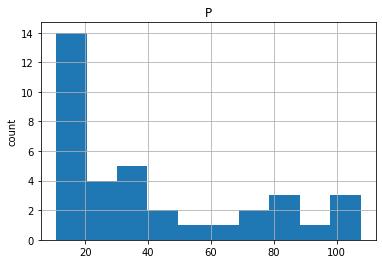

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('./Data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### 2.7 Importing Stata files
Here, you'll gain expertise in importing Stata files as DataFrames using the `pd.read_stata()` function from `pandas`. The last exercise's file, `'disarea.dta'`, is still in your working directory.

**Instructions**

- Use `pd.read_stata()` to load the file `'disarea.dta'` into the DataFrame `df`.
- Print the head of the DataFrame `df`.
- Visualize your results by plotting a histogram of the column `disa10`. We’ve already provided this code for you, so just run it!

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

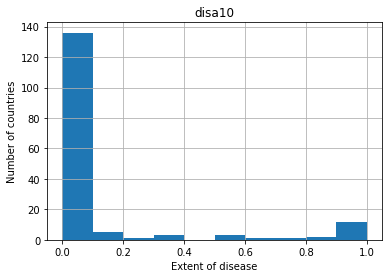

In [30]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('./Data/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


### 2.8 Using h5py to import HDF5 files
The file `'LIGO_data.hdf5'` is already in your working directory. In this exercise, you'll import it using the `h5py` library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

You can find the LIGO data plus loads of documentation and tutorials here. There is also a great tutorial on Signal Processing with the data here.

**Instructions**

- Import the package `h5py`.
- Assign the name of the file to the variable `file`.
- Load the file as read only into the variable data.
- Print the datatype of `data`.
- Print the names of the groups in the HDF5 file `'LIGO_data.hdf5'`.

In [34]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = './data/LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


<class 'h5py._hl.files.File'>
meta
quality
strain


### 2.9 Extracting data from your HDF5 file
In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group `'strain'`.

**Instructions**

- Assign the HDF5 group `data['strain']` to group.
- In the `for` loop, print out the keys of the HDF5 group in `group`.
- Assign to the variable `strain` the values of the time series `data data['strain']['Strain']` using the attribute `.value`.
- Set `num_samples` equal to `10000`, the number of time points we wish to sample.
- Execute the rest of the code to produce a plot of the time series data in `LIGO_data.hdf5`.

Strain


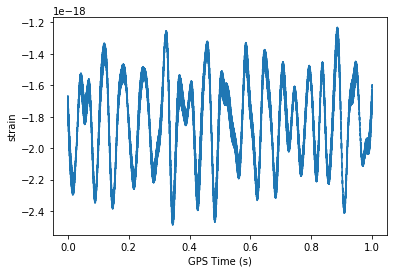

In [36]:
import matplotlib.pyplot as plt

# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### 2.10 Loading .mat files
In this exercise, you'll figure out how to load a MATLAB file using `scipy.io.loadmat()` and you'll discover what Python datatype it yields.

The file `'albeck_gene_expression.mat'` is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis. You can find the data and some great documentation here.

**Instructions**

- Import the package `scipy.io`.
- Load the file `'albeck_gene_expression.mat'` into the variable `mat`; do so using the function `scipy.io.loadmat()`.
- Use the function `type()` to print the datatype of `mat` to the IPython shell.

In [40]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('./Data/albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


<class 'dict'>


### 2.11 The structure of .mat in Python
Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

The file `'albeck_gene_expression.mat'` is already loaded into the variable `mat`. The following libraries have already been imported as follows:
~~~
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
~~~
Once again, this file contains gene expression data from the Albeck Lab at UCDavis. You can find the data and some great documentation here.

**Instructions**

- Use the method `.keys()` on the dictionary `mat` to print the keys. Most of these keys (in fact the ones that do NOT begin and end with '__') are variables from the corresponding MATLAB environment.
- Print the type of the value corresponding to the key `'CYratioCyt'` in `mat`. Recall that `mat['CYratioCyt']` accesses the value.
- Print the shape of the value corresponding to the key `'CYratioCyt'` using the numpy function `shape()`.
- Execute the entire script to see some oscillatory gene expression data!

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


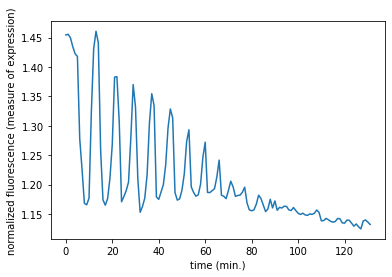

In [41]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


## 3. Working with relational databases in Python

In this chapter, you'll learn how to extract meaningful data from relational databases, an essential element of any data scientist's toolkit. You will be learning about the relational model, creating SQL queries, filtering and ordering your SQL records, and advanced querying by JOINing database tables.

### 3.1 Creating a database engine
Here, you're going to fire up your very first SQL engine. You'll create an engine to connect to the SQLite database `'Chinook.sqlite'`, which is in your working directory. Remember that to create an engine to connect to `'Northwind.sqlite'`, Hugo executed the command
~~~
engine = create_engine('sqlite:///Northwind.sqlite')
~~~
Here, `'sqlite:///Northwind.sqlite'` is called the connection string to the SQLite database `Northwind.sqlite`. A little bit of background on the Chinook database: the Chinook database contains information about a semi-fictional digital media store in which media data is real and customer, employee and sales data has been manually created.

Why the name Chinook, you ask? According to their website,
~~~
The name of this sample database was based on the Northwind database. Chinooks are winds in the interior West of North America, where the Canadian Prairies and Great Plains meet various mountain ranges. Chinooks are most prevalent over southern Alberta in Canada. Chinook is a good name choice for a database that intends to be an alternative to Northwind.
~~~
**Instructions**

- Import the function `create_engine` from the module `sqlalchemy`.
- Create an engine to connect to the SQLite database `'Chinook.sqlite'` and assign it to `engine`.

In [47]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

### 3.2 What are the tables in the database?
In this exercise, you'll once again create an engine to connect to `'Chinook.sqlite'`. Before you can get any data out of the database, however, you'll need to know what tables it contains!

To this end, you'll save the table names to a list using the method `table_names()` on the engine and then you will print the list.

**Instructions**

- Import the function `create_engine` from the module `sqlalchemy`.
- Create an engine to connect to the SQLite database `'Chinook.sqlite'` and assign it to `engine`.
- Using the method `table_names()` on the engine `engine`, assign the table names of `'Chinook.sqlite'` to the variable `table_names`.
- Print the object `table_names` to the shell.

In [48]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)


['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### 3.3 The Hello World of SQL Queries!
Now, it's time for liftoff! In this exercise, you'll perform the Hello World of SQL queries, `SELECT`, in order to retrieve all columns of the table `Album` in the Chinook database. Recall that the query `SELECT *` selects all columns.

**Instructions**

- Open the engine connection as `con` using the method `connect()` on the engine.
- Execute the query that selects ALL columns from the `Album` table. Store the results in `rs`.
- Store all of your query results in the DataFrame `df` by applying the `fetchall()` method to the results `rs`.
- Close the connection!

In [50]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

# Open engine connection: con
con = engine.connect() 

# Perform query: rs
rs = con.execute('select * from Album')

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


### 3.4 Customizing the Hello World of SQL Queries
Congratulations on executing your first SQL query! Now you're going to figure out how to customize your query in order to:

- Select specified columns from a table;
- Select a specified number of rows;
- Import column names from the database table.

Recall that Hugo performed a very similar query customization in the video:
~~~
engine = create_engine('sqlite:///Northwind.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()
~~~
Packages have already been imported as follows:
~~~
from sqlalchemy import create_engine
import pandas as pd
~~~
The engine has also already been created:
~~~
engine = create_engine('sqlite:///Chinook.sqlite')
~~~
The engine connection is already open with the statement
~~~
with engine.connect() as con:
~~~
All the code you need to complete is within this context.

**Instructions**

- Execute the SQL query that selects the columns `LastName` and `Title` from the `Employee` table. Store the results in the variable `rs`.
- Apply the method `fetchmany()` to `rs` in order to retrieve 3 of the records. Store them in the DataFrame `df`.
- Using the `rs` object, set the DataFrame's column names to the corresponding names of the table columns.

In [53]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size = 3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


### 3.4 Filtering your database records using SQL's WHERE
You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

There are a couple more standard SQL query chops that will aid you in your journey to becoming an SQL ninja.

Let's say, for example that you wanted to get all records from the `Customer` table of the Chinook database for which the `Country` is `'Canada'`. You can do this very easily in SQL using a `SELECT` statement followed by a `WHERE` clause as follows:
~~~
SELECT * FROM Customer WHERE Country = 'Canada'
~~~
In fact, you can filter any `SELECT` statement by any condition using a `WHERE` clause. This is called *filtering* your records.

In this interactive exercise, you'll select all records of the `Employee` table for which `'EmployeeId`' is greater than or equal to `6`.

Packages are already imported as follows:
~~~
import pandas as pd
from sqlalchemy import create_engine
~~~
Query away!

**Instructions**

- Complete the argument of `create_engine()` so that the engine for the SQLite database `'Chinook.sqlite'` is created.
- Execute the query that selects all records from the `Employee` table where `'EmployeeId'` is greater than or equal to `6`. Use the `>=` operator and assign the results to `rs`.
- Apply the method `fetchall()` to `rs` in order to fetch all records in `rs`. Store them in the DataFrame `df`.
- Using the `rs` object, set the DataFrame's column names to the corresponding names of the table columns.

In [54]:
# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee WHERE EmployeeId >= 6')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


### 3.5 Ordering your SQL records with ORDER BY
You can also order your SQL query results. For example, if you wanted to get all records from the `Customer` table of the Chinook database and order them in increasing order by the column `SupportRepId`, you could do so with the following query:
~~~
"SELECT * FROM Customer ORDER BY SupportRepId"
~~~
In fact, you can order any `SELECT` statement by any column.

In this interactive exercise, you'll select all records of the `Employee` table and order them in increasing order by the column `BirthDate`.

Packages are already imported as follows:
~~~
import pandas as pd
from sqlalchemy import create_engine
~~~
Get querying!

**Instructions**

- Using the function `create_engine()`, create an engine for the SQLite database `Chinook.sqlite` and assign it to the variable `engine`.
- In the context manager, execute the query that selects all records from the `Employee` table and orders them in increasing order by the column `BirthDate`. Assign the result to `rs`.
- In a call to `pd.DataFrame()`, apply the method `fetchall()` to `rs` in order to fetch all records in `rs`. Store them in the DataFrame `df`.
- Set the DataFrame's column names to the corresponding names of the table columns.

In [3]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee ORDER BY BirthDate')
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())


   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

### 3.6 Pandas and The Hello World of SQL Queries!
Here, you'll take advantage of the power of `pandas` to write the results of your SQL query to a DataFrame in one swift line of Python code!

You'll first import `pandas` and create the SQLite `'Chinook.sqlite'` engine. Then you'll query the database to select all records from the `Album` table.

Recall that to select all records from the `Orders` table in the Northwind database, Hugo executed the following command:
~~~
df = pd.read_sql_query("SELECT * FROM Orders", engine)
~~~
**Instructions**

- Import the `pandas` package using the alias `pd`.
- Using the function `create_engine()`, create an engine for the SQLite database `Chinook.sqlite` and assign it to the variable `engine`.
- Use the `pandas` function `read_sql_query()` to assign to the variable `df` the DataFrame of results from the following query: select all records from the table `Album`.
- The remainder of the code is included to confirm that the DataFrame created by this method is equal to that created by the previous method that you learned.

In [4]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Album', engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


### 3.7 Pandas for more complex querying
Here, you'll become more familiar with the pandas function `read_sql_query()` by using it to execute a more complex query: a `SELECT` statement followed by both a `WHERE` clause AND an `ORDER BY` clause.

You'll build a DataFrame that contains the rows of the `Employee` table for which the `EmployeeId` is greater than or equal to `6` and you'll order these entries by `BirthDate`.

**Instructions**

- Using the function `create_engine()`, create an engine for the SQLite database `Chinook.sqlite` and assign it to the variable `engine`.
- Use the `pandas` function `read_sql_query()` to assign to the variable `df` the DataFrame of results from the following query: select all records from the `Employee` table where the `EmployeeId` is greater than or equal to `6` and ordered by `BirthDate` (make sure to use `WHERE` and `ORDER BY` in this precise order).

In [2]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///./Data/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Employee WHERE EmeeId >= 6 ORDER BY BirthDate', engine)

# Print head of DataFrame
print(df.head())


OperationalError: (sqlite3.OperationalError) no such column: EmeeId
[SQL: SELECT * FROM Employee WHERE EmeeId >= 6 ORDER BY BirthDate]
(Background on this error at: http://sqlalche.me/e/e3q8)

### 3.8 The power of SQL lies in relationships between tables: INNER JOIN
Here, you'll perform your first `INNER JOIN`! You'll be working with your favourite SQLite database, `Chinook.sqlite`. For each record in the `Album` table, you'll extract the `Title` along with the `Name` of the `Artist`. The latter will come from the `Artist` table and so you will need to `INNER JOIN` these two tables on the `ArtistID` column of both.

Recall that to `INNER JOIN` the `Orders` and `Customers` tables from the Northwind database, Hugo executed the following SQL query:
~~~
"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"
~~~
The following code has already been executed to import the necessary packages and to create the engine:
~~~
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')
~~~

**Instructions**

- Assign to `rs` the results from the following query: select all the records, extracting the `Title` of the record and `Name` of the artist of each record from the `Album` table and the `Artist` table, respectively. To do so, `INNER JOIN` these two tables on the `ArtistID` column of both.
- In a call to `pd.DataFrame()`, apply the method `fetchall()` to `rs` in order to fetch all records in `rs`. Store them in the DataFrame `df`.
- Set the DataFrame's column names to the corresponding names of the table columns.

In [3]:
engine = create_engine('sqlite:///./Data/Chinook.sqlite')
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


### 3.9 Filtering your INNER JOIN
Congrats on performing your first `INNER JOIN`! You're now going to finish this chapter with one final exercise in which you perform an `INNER JOIN` and filter the result using a `WHERE` clause.

Recall that to `INNER JOIN` the `Orders` and `Customers` tables from the Northwind database, Hugo executed the following SQL query:
~~~
"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"
~~~
The following code has already been executed to import the necessary packages and to create the engine:
~~~
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')
~~~
***Instructions**

- Use the `pandas` function `read_sql_query()` to assign to the variable `df` the DataFrame of results from the following query: select all records from `PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId` that satisfy the condition `Milliseconds < 250000`.

In [4]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    'SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackID WHERE Milliseconds < 250000', engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  


# Importing Data in Python (Part 2)

As a Data Scientist, on a daily basis you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before doing any of these, however, you will need to know how to get data into Python. In the prequel to this course, you have already learnt many ways to import data into Python: (i) from flat files such as .txts and .csvs; (ii) from files native to other software such as Excel spreadsheets, Stata, SAS and MATLAB files; (iii) from relational databases such as SQLite & PostgreSQL. In this course, you'll extend this knowledge base by learning to import data (i) from the web and (ii) a special and essential case of this: pulling data from Application Programming Interfaces, also known as APIs, such as the Twitter streaming API, which allows us to stream real-time tweets.



## 4 Importing data from the Internet
The web is a rich source of data from which you can extract various types of insights and findings. In this chapter, you will learn how to get data from the web, whether it be stored in files or in HTML. You'll also learn the basics of scraping and parsing web data.



### 4.1 Importing flat files from the web: your turn!
You are about to import your first file from the web! The flat file you will import will be `'winequality-red.csv'` from the University of California, Irvine's Machine Learning repository. The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is
~~~
'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
~~~

After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a `pandas` DataFrame.

**Instructions**

- Import the function `urlretrieve` from the subpackage `urllib.request`.
- Assign the URL of the file to the variable `url`.
- Use the function `urlretrieve()` to save the file locally as `'winequality-red.csv'`.
- Execute the remaining code to load `'winequality-red.csv'` in a pandas DataFrame and to print its head to the shell.

In [6]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'


# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### 4.2 Opening and reading flat files from the web
You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using `pandas`. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator sep as the second argument.

The URL of the file, once again, is
~~~
'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
~~~

**Instructions**

- Assign the URL of the file to the variable `url`.
- Read file into a DataFrame `df` using `pd.read_csv()`, recalling that the separator in the file is `';'`.
- Print the head of the DataFrame `df`.
- Execute the rest of the code to plot histogram of the first feature in the DataFrame `df`.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

C:\Users\124501\.conda\envs\datacamp\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


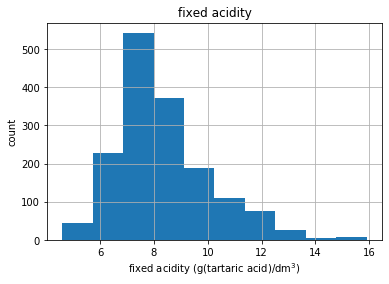

In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'


# Read file into a DataFrame: df
df = pd.read_csv(url, sep = ';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


### 4.3 Importing non-flat files from the web
Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the `pandas` function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

The URL of the spreadsheet is
~~~
'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
~~~
Your job is to use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

**Instructions**

- Assign the URL of the file to the variable `url`.
- Read the file in `url` into a dictionary `xl` using `pd.read_excel()` recalling that, in order to import all sheets you need to pass `None` to the argument `sheetname`.
- Print the names of the sheets in the Excel spreadsheet; these will be the keys of the dictionary `xl`.
- Print the head of the first sheet using the sheet name, not the index of the sheet! The sheet name is `'1700'`

In [4]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'


# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())


odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### 4.4 Performing HTTP requests in Python using urllib
Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from our teach page, `"http://www.datacamp.com/teach/documentation"`.

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

**Instructions**

- Import the functions `urlopen` and `Request` from the subpackage `urllib.request`.
- Package the request to the url `"http://www.datacamp.com/teach/documentation"` using the function `Request()` and assign it to `request`.
- Send the request and catch the response in the variable `response` with the function `urlopen()`.
- Run the rest of the code to see the datatype of `response` and to close the connection!

In [6]:
# Import packages
from urllib.request import urlopen, Request


# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()


<class 'http.client.HTTPResponse'>


### 4.5 Printing HTTP request results in Python using urllib
You have just packaged and sent a GET request to `"http://www.datacamp.com/teach/documentation"` and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a `http.client.HTTPResponse` object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

**Instructions**

- Send the request and catch the `response` in the variable response with the function `urlopen()`, as in the previous exercise.
- Extract the response using the `read()` method and store the result in the variable `html`.
- Print the string `html`.
- Hit submit to perform all of the above and to close the response: be tidy!


In [7]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="CspiV1BOZ1bwrJ1/+YKB2KhnCG09YL1YZgZdRzoMqcw="></script>\n      <script nonce="CspiV1BOZ1bwrJ1/+YKB2KhnCG09YL1YZgZdRzoMqcw=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;edu

### 4.6 Performing HTTP requests in Python using requests
Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their `"http://www.datacamp.com/teach/documentation"` page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

**Instructions**

- Import the package `requests`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the text attribute of the object r to return the HTML of the webpage as a string; store the result in a variable `text`.
- Hit submit to print the HTML of the webpage.

In [8]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="wDbhkbBsQYjiB+z/aLpZzMGG1ZPULUJojJUxe9vbs2s="></script>
      <script nonce="wDbhkbBsQYjiB+z/aLpZzMGG1ZPULUJojJUxe9vbs2s=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;educate_home&quot;,&quot;pl

### 4.7 Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is url = `https://www.python.org/~guido/'`.

**Instructions**

- Import the function `BeautifulSoup` from the package `bs4`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the `text` attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable `html_doc`.
- Create a BeautifulSoup object `soup` from the resulting HTML using the function `BeautifulSoup()`.
- Use the method `prettify()` on `soup` and assign the result to `pretty_soup`.
- Hit submit to print to prettified HTML to your shell!

In [11]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
   <h3>
    <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
     Who
I Am
    </a>
   </h3>
   <p>
    Read
my
    <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
     "King's
Day Speech"
    </a>
    for some inspiration.
    <p>
     I am the author of the
     <a href="http://www.python.org">
      Python
     </a>
     programming language.  See also my
     <a href="Resume.html">
      resume
     </a>
   

### 4.8 Turning a webpage into data using BeautifulSoup: getting the text
As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

**Instructions**

- In the sample code, the HTML response object `html_doc` has already been created: your first task is to Soupify it using the function `BeautifulSoup()` and to assign the resulting soup to the variable `soup`.
- Extract the title from the HTML soup `soup` using the attribute `title` and assign the result to `guido_title`.
- Print the title of Guido's webpage to the shell using the `print()` function.
- Extract the text from the HTML soup `soup` using the method `get_text()` and assign to `guido_text`.
- Hit submit to print the text from Guido's webpage to the shell.

In [12]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) pytho

### 4.9 Turning a webpage into data using BeautifulSoup: getting the hyperlinks
In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

**Instructions**

- Use the method `find_all()` to find all hyperlinks in `soup`, remembering that hyperlinks are defined by the HTML tag `<a>` but passed to `find_all()` without angle brackets; store the result in the variable `a_tags`.
- The variable `a_tags` is a results set: your job now is to enumerate over it, using a `for` loop and to print the actual URLs of the hyperlinks; to do this, for every element `link` in `a_tags`, you want to `print()` `link.get('href')`.

In [13]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.findAll('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


### 5. Interacting with APIs to import data from the web

In this chapter, you will push further on your knowledge of importing data from the web. You will learn the basics of extracting data from APIs, gain insight on the importance of APIs and practice getting data from them with dives into the OMDB and Library of Congress APIs.

### 5.1 Loading and exploring a JSON
Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. Here, you'll load the JSON `'a_movie.json'` into the variable `json_data`, which will be a dictionary. You'll then explore the JSON contents by printing the key-value pairs of `json_data` to the shell.

**Instructions**

- Load the JSON `'a_movie.json'` into the variable `json_data` within the context provided by the `with` statement. To do so, use the function `json.load()` within the context manager.
- Use a `for` loop to print all key-value pairs in the dictionary `json_data`. Recall that you can access a value in a dictionary using the syntax: *dictionary*`[key]`.

In [9]:
import json
# Load JSON: json_data
#with open("./Data/a_movie.json") as json_file:
with open("./Data/example_2.json") as json_file:    
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

quiz:  {'sport': {'q1': {'question': 'Which one is correct team name in NBA?', 'options': ['New York Bulls', 'Los Angeles Kings', 'Golden State Warriros', 'Huston Rocket'], 'answer': 'Huston Rocket'}}, 'maths': {'q1': {'question': '5 + 7 = ?', 'options': ['10', '11', '12', '13'], 'answer': '12'}, 'q2': {'question': '12 - 8 = ?', 'options': ['1', '2', '3', '4'], 'answer': '4'}}}


### 5.2 API requests
Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was `'http://www.omdbapi.com/?t=hackers'` and had a single argument `t=hackers`.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: `apikey=72bc447a`.

**Instructions**

- Import the `requests` package.
- Assign to the variable `url` the URL of interest in order to query `'http://www.omdbapi.com'` for the data corresponding to the movie The Social Network. The query string should have two arguments: `apikey=72bc447a` and `t=the+social+network`. You can combine them as follows: `apikey=72bc447a&t=the+social+network`.
- Print the text of the reponse object `r` by using its `text` attribute and passing the result to the `print()` function.

In [10]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)


{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"567,207","imdbID":"tt

### 5.3 JSON–from the web to Python
Wow, congrats! You've just queried your first API programmatically in Python and printed the text of the response to the shell. However, as you know, your response is actually a JSON, so you can do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. That's what you're going to do now!

**Instructions**

- Pass the variable `url` to the `requests.get()` function in order to send the relevant request and catch the response, assigning the resultant response message to the variable `r`.
- Apply the `json()` method to the response object `r` and store the resulting dictionary in the variable `json_data`.
- Hit `Submit Answer` to print the key-value pairs of the dictionary `json_data` to the shell.

In [11]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  567,207
imdbID:  tt1285016
Type:  movie
DVD:

### 5.4 Checking out the Wikipedia API
You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here). You'll figure out how to find and extract information from the Wikipedia page for Pizza. What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

The URL that requests the relevant query from the Wikipedia API is
~~~
https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza
~~~
**Instructions**

- Assign the relevant URL to the variable `url`.
- Apply the `json()` method to the response object `r` and store the resulting dictionary in the variable `json_data`.
- The variable `pizza_extract` holds the HTML of an extract from Wikipedia's Pizza page as a string; use the function `print()` to print this string to the shell.


In [12]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. In formal settings, like a restaurant, pizza is eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since 

## 6. Diving deep into the Twitter API

In this chapter, you will consolidate your knowledge of interacting with APIs in a deep dive into the Twitter streaming API. You'll learn how to stream real-time Twitter data and to analyze and visualize it!

### 6.1 API Authentication
The package `tweepy` is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

**Instructions**

- Import the package `tweepy`.
- Pass the parameters `consumer_key` and `consumer_secret` to the function `tweepy.OAuthHandler()`.
- Complete the passing of OAuth credentials to the OAuth handler `auth` by applying to it the method `set_access_token()`, along with arguments `access_token` and `access_token_secret`.

In [30]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


### 6.2 Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, MyStreamListener, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here.

Your task is to create the Streamobject and to filter tweets according to particular keywords.

**Instructions**

- Create your Stream object with authentication by passing tweepy.Stream() the authentication handler auth and the Stream listener l;
- To filter Twitter streams, pass to the track argument in stream.filter() a list containing the desired keywords 'clinton', 'trump', 'sanders', and 'cruz'.

In [36]:
# Import package
import tweepy
import json

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()
        
# Store OAuth authentication credentials in relevant variables (these are DataCamp tokens)
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

### 6.3 Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: `tweets_data`.

**Instructions**

- Assign the filename `'tweets.txt'` to the variable `tweets_data_path`.
- Initialize tweets_data as an empty list to store the tweets in.
- Within the for loop initiated by `for line in tweets_file`:, load each tweet into a variable, `tweet`, using `json.loads()`, then append `tweet` to tweets_data using the `append()` method.
- Hit submit and check out the keys of the first tweet dictionary printed to the shell.

In [2]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = './Data/tweets3.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### 6.4 Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, `tweets_data`, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, `t1`, is stored as the value `t1['text']`; similarly, the language is stored in `t1['lang']`. Your task is to build a DataFrame in which each row is a tweet and the columns are `'text'` and `'lang'`.

**Instructions**

- Use `pd.DataFrame()` to construct a DataFrame of tweet texts and languages; to do so, the first argument should be `tweets_data`, a list of dictionaries. The second argument to `pd.DataFrame()` is a list of the keys you wish to have as columns. Assign the result of the `pd.DataFrame()` call to `df`.
- Print the head of the DataFrame.

In [3]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())


                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


### 6.5 A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function `word_in_text()`, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).
~~~
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
~~~
You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

**Instructions**

- Within the `for` loop `for index, row in df.iterrows():`, the code currently increases the value of `clinton` by `1` each time a tweet (text row) mentioning 'Clinton' is encountered; complete the code so that the same happens for `trump`, `sanders` and `cruz`.

In [6]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

import inspect
lines = inspect.getsource(word_in_text)
print(lines)

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False



### 6.6 Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:
~~~
1. a list of labels and
2. a list containing the variables you wish to plot (clinton, trump and so on.)
~~~
Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

**Instructions**
- Import both `matplotlib.pyplot` and `seaborn` using the aliases `plt` and `sns`, respectively.
- Complete the arguments of `sns.barplot`: the first argument should be the labels to appear on the x-axis; the second argument should be the list of the variables you wish to plot, as produced in the previous exercise.

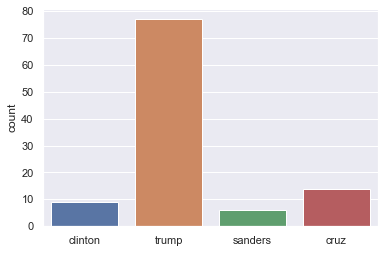

In [7]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()
